## Recovering the hidden states using Viterbi algorithm

Avant de commencer nous allons répondre aux questions suivantes.


### Q1

Dans une urne on a 100 dés. On sait qu'il y a 25 qui sont pipés. Pour les dés pipés, la probabilité d'avoir un 6 est de 1/2 et la probabilité d'avoir n'importe quelle autre valeur est de 1/10. Les autres 75 dés sont non pipés et donc, toutes les valeurs ont la même probabilité.  
On prend un dé au hasard dans l'urne et on fait trois lancés. On obtient "666".   
a) Calculer la probabilité d'avoir tiré un dé pipé.  
b) Calculer la probabilité d'avoir choisi un dé non pipé.


**Solution**  

On appellera $d_0$ l'evenement "choisir un dé non pipé" et $d_1$ "choisir un dé pipé".

$$P(d_1 | (6,6,6))=\frac{P((6,6,6) | d_1)P(d_1)}{P((6,6,6))}$$

$$P(d_1) = 0.25$$

$$P((6,6,6) | d_1) = (1/2)^3$$

$$P((6,6,6)) = P((6,6,6) | d_1)P(d_1) + P((6,6,6) | d_0)P(d_0)$$

$$P((6,6,6)) = (1/2)^3 * 0.25 + (1/6)^3 * 0.75 = 0.0347$$

$$P(d_1 | (6,6,6)) = 0.8999 \approx 0.9$$


On au aussi

$$P(d_0 | (6,6,6)) \approx 0.1 $$

### Q2

Revenons maintenant à l'exemple du casino malhonnête. Le casino a un dé qui es pipé et un dé qui est juste. Pour commencer, il choisi un dé au hasard. Chaque dé a la même probabilité d'être pris pour commencer. Après chaque tirage, le casino peut changer le dé non pipé par le dé pipé avec probabilité de 0.05. De même, il peut changer le dé pipé par le dé non pipé avec probabilité de 0.1.   

An appellera $A$ la matrice de transition, $B$ la matrice d'émission et $\pi$ le vecteur de probabilité initial. On a donc :

$$A=\begin{bmatrix}0.95 & 0.05\\0.1 & 0.9\end{bmatrix}$$

$$B=\begin{bmatrix}1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
1/10 & 1/10 & 1/10 & 1/10 & 1/10 & 1/2\end{bmatrix}$$


$$\pi=\left[\begin{array}{c} 1/2 \\ 1/2\end{array}\right]$$


On commence à jouer et on observe deux fois le numéro $6$. Comment trouver la séquence de dés utilisée lors des deux premiers qui explique au mieux ces valeurs ?

**Solution**  
Il faudrait calculer : $P(d_0d_0|(6, 6))$, $P(d_0d_1|(6, 6))$, $P(d_1d_0|(6, 6))$ et $P(d_1d_1|(6, 6))$.

$$P(d_0d_0|(6, 6)) = \frac{P((6, 6) | d_0d_0)P(d_0d_0)}{P((6, 6))}$$

$$P((6, 6) | d_0d_0) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36}$$

$$P(d_0d_0) = \frac{1}{2} \times 0.95 = 0.475$$

$$P((6, 6)) = P((6, 6) | d_0d_0)P(d_0d_0) + P((6, 6) | d_0d_1)P(d_0d_1) +
\\ P((6, 6) | d_1d_0)P(d_1d_0) + P((6, 6) | d_1d_1)P(d_1d_1)$$

$$= \frac{1}{6} \times \frac{1}{6} \times  \frac{1}{2} \times 0.95 + \frac{1}{6} \times \frac{1}{2} \times  \frac{1}{2} \times 0.05 +
\frac{1}{2} \times \frac{1}{6} \times  \frac{1}{2} \times 0.1 + \frac{1}{2} \times \frac{1}{2} \times  \frac{1}{2} \times 0.9$$

$$ \approx 0.132$$

$$P(d_0d_0|(6, 6)) \approx 0.0999$$

De la même manière on peut calculer :

$$P(d_0d_1|(6, 6)) \approx 0.0158$$

$$P(d_1d_0|(6, 6)) \approx 0.03157$$

$$P(d_1d_1|(6, 6)) \approx 0.8526$$

On peut remarquer que la séquence d'états cachés qui explique au mieux l'observation "(6, 6)" est la séquence "$d_1d_1$".

### Cas général

**Comment trouver la séquence d'états cachés qui explique au mieux une séquence quelconque d'observacions ?**

## Algorithme de Viterbi

On note $(x_1, x_2, ..., x_n)$ la séquence d'états cachés et $(y_1, y_2, ..., y_n)$ les observations correspondantes. On appellera $S$ l'espace des états cachés. Dans l'exemple du casino malhonnête $S=\{0, 1\}$, soit on a lancé le dé est pipé, soit on a lancé le dé non pipé. On appellera $A$ la matrix de transition, $B$ la matrice d'émission et $\pi$ le vecteur de probabilité initial. La clé de l'algorithme de Viterbi consiste à définir la quantité $V_{tk}$ qui représente  
*la probabilité du chemin **le plus probable** qui finit dans l'état caché $k$ lors du tirage numéro $t$*.

$$\begin{array}{ll}
V_{1k} = & b_{k,y_{1}}\pi_k \\
V_{tk} = &b_{k,y_{t}} \displaystyle \max_{x\in S}a_{x,k} V_{t-1,x}
\end{array}
$$

Cette définition permet trouver par calcul recursive le dernier élément de la séquence d'états cachés :

$$x_n = \displaystyle \arg\max_{x\in S} V_{n,x}$$


In [1]:
from dishonest_casino import dishonest_casino_play
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

fair_prob = [1./6, 1./6, 1./6, 1./6, 1./6, 1./6]
unfair_prob = [1./10, 1./10, 1./10, 1./10, 1./10, 1./2]
switch_to_loaded_dice_prob = 0.05
switch_to_fair_dice_prob = 0.1
n = 1000000
h, v = dishonest_casino_play(n=n, fair_prob=fair_prob, unfair_prob=unfair_prob,
                             prob_switch_to_unfair=switch_to_loaded_dice_prob,
                             prob_switch_to_fair=switch_to_fair_dice_prob)

In [2]:
obs_states = [i-1 for i in v]
hidden_states = [0, 1]
initial_prob = [0.5, 0.5]
trans_prob = np.matrix([[0.95, 0.05, 1], [0.1, 0.9, 1]])  
# Note there is one artificial state added in the last column
# of the matrix
emis_prob = np.matrix([[1./6, 1./6, 1./6, 1./6, 1./6, 1./6],
             [0.1, 0.1, 0.1, 0.1, 0.1, 0.5], [1, 1, 1, 1, 1, 1]])
# Note there is one artificial state added in the last row
# of the matrix
S = [i for i in range(trans_prob.shape[0])] # the hidden states

In [3]:
# Recursive implementation of the Viterbi algorithm


def recursive_viterbi(obs, pi, A, B, S, t, k, Vp):
    """
    obs: observations
    pi: initial probabilities
    A: transition probabilities
    B: emision probabilities
    S: the space of hidden states
    final_h: the final hidden state
    Vp: viterbi path
    """
    if t == 1:
        V1k = B[k, obs[0]] * pi[k]
        #print("Base case. Prob = {}".format(V1k))
        return V1k
    else:
        vector = np.array([A[i, k] * recursive_viterbi(obs, pi, A, B, S, t-1, i, Vp) for i in S])
        #print(vector)
        Vtk = B[k, obs[t-1]] * np.max(vector)
        xt = np.argmax(vector)
        #print("The hidden state at {} is {}".format(t-1, xt))
        Vp[t-2] = xt
        return Vtk

In [4]:
n = 20
Vp = -np.ones(n)
recursive_viterbi(obs_states[:n], initial_prob, trans_prob, emis_prob, S, n, 2, Vp)

1.1325838347575636e-15

In [5]:
print([int(i) for i in Vp])
print(h[:20])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


## Idée pour la programation dynamique

Lorsqu'on utilise l'algorithme recursive, on calcule beaucoup de fois la même quantité (c'est à dire, les $V_{tk}$). On peut noter cela si on imprime un message à chaque fois qu'une de ces quantitées est calculée.

Afin d'améliorer l'algorithme, on peut utiliser la programation dymanique. C'est à dire, on va calculer tous les $V_{tk}$ pour tout $t$ et $k$.

De plus, comme on est en train de faire beaucoup de multiplications de valeurs inférieures à $1$, les quantités devienent très petites. Une autre amélioration consiste à **utiliser plutôt "log" pour le calcul des quantités $V_{tk}$**

In [6]:
def viterbi(obs, pi, A, B):
    """
    obs: observations
    pi: initial probabilities
    A: transition probabilities
    B: emision probabilities
    """
    S = [i for i in range(trans_prob.shape[0])] # the hidden states
    Vtk_matrix = -np.ones((len(S), len(obs)))
    for k in S:
        Vtk_matrix[k, 0] = np.log(B[k, obs[0]]) + np.log(pi[k])
    for t in range(1, len(obs)):
        for k in S:
            # Compute Vtk
            vector = np.array([np.log(A[i, k]) + Vtk_matrix[i, t-1] for i in S])
            Vtk_matrix[k, t] = np.log(B[k, obs[t]]) + np.max(vector)
    # Finding the path
    x = -np.ones(len(obs))
    for t in range(len(obs)):
        x[-(t+1)] = np.argmax(Vtk_matrix[:, -(t+1)])
    return x


In [7]:
n = -1
viterbi(obs_states[:n], initial_prob, trans_prob, emis_prob)

array([0., 1., 0., ..., 1., 1., 1.])

In [8]:
np.array(h)

array([0, 0, 0, ..., 1, 1, 1])

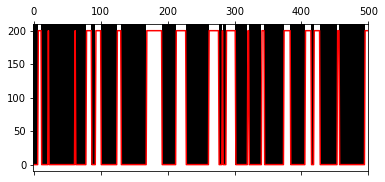

In [9]:
# Verify the algorithm accuracy

n = 500
mat = np.zeros((n, n))
for i in range(n):
    mat[i,] = h[:n]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(mat,cmap='gray')
ax.plot([i*200 for i in h[:n]], color='r')
ax.set_ylim(-10, 210)
plt.show()

Il existe une librairie python ([pomegranate](https://pomegranate.readthedocs.io/en/latest/#) ) qui permet, entre autres de travailler avec de modeles HMM. Faire une validaiton avec la méthode Viterbi implementée [dans pomegranate](https://pomegranate.readthedocs.io/en/latest/HiddenMarkovModel.html)